In [ ]:
# conda install seaborn 
# pip install scikit-learn 
# conda install scikit-learn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
plt.style.use("ggplot")
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

In [2]:
admission = pd.read_csv("Admission_Predict.csv")

In [3]:
admission.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
admission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [ ]:
admission.describe()

In [5]:
admission.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [6]:
admission = admission.drop("Serial No.", axis=1)

In [7]:
admission.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [8]:
admission["GRE Score"].corr(admission["TOEFL Score"])

0.835976803014396

## Exploratory Data Analysis

<Axes: >

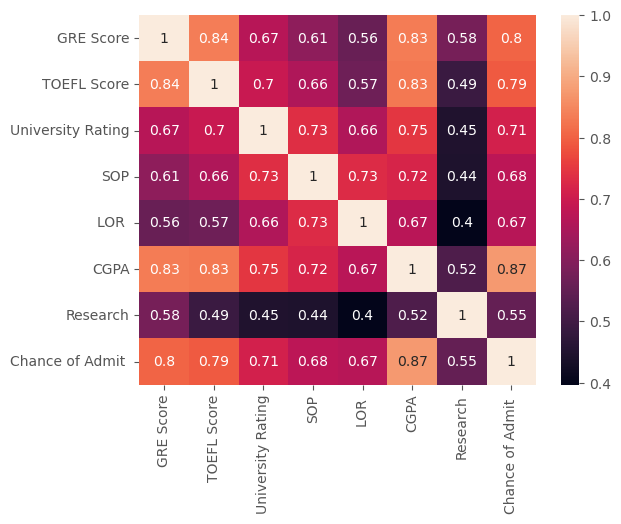

In [9]:
sns.heatmap(admission.corr(), annot=True)

In [ ]:
admission.columns

## Separation between features and target, training and testing sets

In [10]:
X = admission.iloc[:, 0:-1]
y = admission.iloc[:, -1]

In [11]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
395    0.82
396    0.84
397    0.91
398    0.67
399    0.95
Name: Chance of Admit , Length: 400, dtype: float64

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=98)

## Train and predict the model

In [13]:
lm = LinearRegression()

In [14]:
lm.fit(X_train, y_train)

LinearRegression()

In [15]:
y_pred = lm.predict(X_test)

In [16]:
y_pred

array([0.52457661, 0.78547639, 0.53491583, 0.69305614, 0.64235336,
       0.80050471, 0.93750422, 0.74913408, 0.77175462, 0.67369816,
       0.51506831, 0.85027114, 0.76930202, 0.52386262, 0.59051589,
       0.754334  , 0.72807191, 0.69138113, 0.67734376, 0.94739954,
       0.73894363, 0.67581562, 0.88604915, 0.71264465, 0.63483027,
       0.64379964, 0.69924659, 0.48772441, 0.8382383 , 0.63892761,
       0.78967313, 0.49995335, 0.6295689 , 0.66621278, 0.81080134,
       0.6929248 , 0.58420661, 0.90277874, 0.58656193, 0.84234976,
       0.54020492, 0.70108577, 0.5178437 , 0.73191744, 0.7779031 ,
       0.73259682, 0.81361834, 0.60434697, 0.47874359, 0.84519279,
       0.46061923, 0.62162627, 0.55673507, 0.74882892, 0.44555668,
       0.9596894 , 0.4877442 , 0.54499807, 0.59304612, 0.77896042,
       0.73619129, 0.77847996, 0.6379257 , 0.69271334, 0.64543415,
       0.63485589, 0.65424386, 0.65647163, 0.62837262, 0.72439566,
       0.72685658, 0.60571452, 0.56471346, 0.78604907, 0.60198

In [17]:
lm.coef_

array([ 0.00119809,  0.00171724,  0.00172541, -0.00263234,  0.02541492,
        0.14330827,  0.02780172])

In [18]:
lm.intercept_

-1.1725498445619391

## Visualize the results

In [ ]:
plt.rcParams['font.size'] = 12

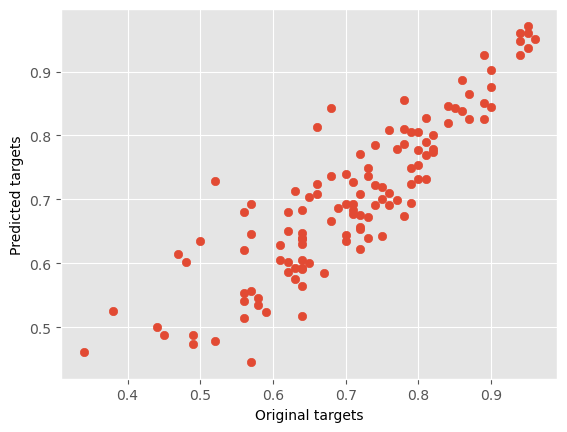

In [19]:
plt.scatter(y_test, y_pred)
plt.xlabel("Original targets")
plt.ylabel("Predicted targets")

plt.show()

## Evaluation

In [ ]:
print("MAE :", mean_absolute_error(y_test, y_pred))
print("MSE :", mean_squared_error(y_test, y_pred))
print("RMSE :", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 score:", r2_score(y_test, y_pred))

In [20]:
print(lm.score(X_test, y_test))

0.765917639580642


In [ ]:
print(lm.score(X_train, y_train))